- ## Name: `Uday Bhardwaj`
- ## Id: `12241910`
- ## Topic: `DS201-Assignment 1`

---
## __Question 1__

### __Introduction__

- #### The problem consists of calculating the frequency of each alphabet in the file and then calculating their probability, uncertainty and entropy.
- #### Primarily, the data structure of dictionary is used for storage and the prettytable library is used to print in a better format.

### __Procedure__

#### The method used here is simple and it consists of the following mentioned steps.
  1. ##### First, I read from the file line-by-line to avoid all the data. I end this step by checking whether the file has ended/not. During this, each letter is converted into lowercase to avoid confusion.
  2. ##### Afterward, I have a dictionary which has the _alphabets_ as _Keys_ and their _frequency_ in the file as _Values_.
  3. ##### I normalize this dictionary and create a new dictionary which has _Probability_ as the values to the keys.
  4. ##### With the help of the function given below, I applied it to get the individual uncertainty and store it in another dictionary.
$$ U(i) =  (-p_i\;log\;p_i) $$  
  5. ##### Finally, we sum all the Uncertainty values to get the _Entropy_.

### __Imports and Functions used__

In [1]:
from prettytable import PrettyTable
from math import log2
import matplotlib.pyplot as plt


def pretty_table( message:str , obj:dict )->None:
  """Summary
      This prints the dictionary in a better format with the help of prettytable library.

  Args:
      message (str): This is the message which is to be passed alongside the dictionary.
      obj (dict): This is the dictionary which is to be inputted to be printed in the prettytable format.
  """

  TABLE = PrettyTable()
  for c in obj.keys():
    TABLE.add_column(c, [  ])
  TABLE.add_row( [ obj[ ky ] for ky in obj.keys() ] )

  print( f'{message}' , TABLE )


def file_letter( path:str )->dict:
  """Summary

  Args:
      path (str): This is the variable which takes in the path for the file from which data is to be checked.

  Returns:
      dict: It returns a dict which has letter as keys and their frequencies as the value to the key.
  """
  alphabet_count : dict = {}

  # Making the dictionary of the format mentioned above
  for i in range(97,123,1):
    alphabet_count[ chr(i) ] = 0

  sum_ = 0
  # Opening the file and processing count line by line to avoid storing overheads
  with open( path , 'r') as file:

    while True:
      line:str = file.readline()

      for letter in line:

        temp = alphabet_count.get( letter.lower() )

        if temp!=None:
          alphabet_count[ letter.lower() ] += 1
          sum_ += 1

      # Checking for the end of file
      if "" == line :
        break

  return alphabet_count


def entropy( Uncertainty:dict )->float:
  """Summary:
    It returns the Entropy of the values which were passed in the dictionary as the keys.

  Args:
      Uncertainty (dict): This is a dictionary which contains the alphabets as keys and their uncertainty in the file as the values .
  """

  Entropy =0
  for key in Uncertainty:
    Entropy += Uncertainty[ key ]
  return Entropy

def top_10( alpha_frequency:dict )->dict:
  """Summary
        This returns a dictionary of the top 10 alphabets and their frequencies sorted by their frequency
  Args:
      alpha_frequency (dict): Alphabets are the keys and their frequency from the file are the values.

  Returns:
      dict: Dictionary with top 10 alphabets
  """
  top = {  i:alpha_frequency[i]  for i in (sorted(alpha_frequency,key=alpha_frequency.get, reverse=True))[:10] }
  return top


def probab( alpha_frequency:dict )->dict:
  """Summary
      This returns a dictionary where keys are the alphabets and the values are the individual probability of occuring in the file.
  Args:
      alpha_frequency (dict): _description_

  Returns:
      dict: _description_
  """

  sum_ = sum(alpha_frequency.values())
  alpha_prob = { key:alpha_frequency[key]/sum_ for key in alpha_frequency }

  return alpha_prob

def uncertain( alpha_probab:dict )->dict:
  """Summary
    This returns a dictionary where the keys are the alphabets and the values are the individual uncertainty of the alphabets.

  Args:
      alpha_probab (dict): Dictionary with alphabets as keys and their probability of occuring in the file as values.

  Returns:
      dict: Dictionary with alphabets as keys and their indvidual uncertainty as values.
  """
  Uncertainty = { key : ( -1 * alpha_probab[ key ] *  log2( alpha_probab[ key ] ) ) for key in alpha_probab }
  return Uncertainty

### __Code__

#### __File A: Time Machine__

In [2]:
# The frequency of each letter
fileA_count = file_letter( './fileA.txt' )

# Top 10 most occuring element
fileA_top10 = top_10( fileA_count )
pretty_table( '\nTop 10 most occuring element:\n',top_10( fileA_count ) )

# The probability for each alphabet
fileA_probab = probab( fileA_count )
pretty_table( '\nProbabiltity for each element:\n' , fileA_probab )

# The Uncertainty for each alphabet
fileA_uncertain = uncertain( fileA_probab )
pretty_table( '\nThe Uncertainlty for each element:\n' , fileA_uncertain )

# The Total Entropy
fileA_entropy = entropy( fileA_uncertain )
print( f"\nThe total Entropy is {fileA_entropy}" )



Top 10 most occuring element:
 +-------+-------+-------+-------+-------+-------+------+------+------+------+
|   e   |   t   |   a   |   i   |   o   |   n   |  s   |  r   |  h   |  d   |
+-------+-------+-------+-------+-------+-------+------+------+------+------+
| 19678 | 15072 | 12717 | 11262 | 11108 | 10969 | 9288 | 8855 | 8798 | 6857 |
+-------+-------+-------+-------+-------+-------+------+------+------+------+

Probabiltity for each element:
 +--------------------+----------------------+--------------------+---------------------+---------------------+---------------------+----------------------+---------------------+---------------------+-----------------------+----------------------+---------------------+----------------------+---------------------+---------------------+----------------------+-----------------------+---------------------+---------------------+---------------------+---------------------+----------------------+----------------------+-----------------------+-----

#### __File B: Jane Eyre__

In [3]:
# The frequency of each letter
fileB_count = file_letter( './fileB.txt' )

# Top 10 most occuring element
fileB_top10 = top_10( fileB_count )
pretty_table( '\nTop 10 most occuring element:\n',top_10( fileB_count ) )

# The probability for each alphabet
fileB_probab = probab( fileB_count )
pretty_table( '\nProbabiltity for each element:\n' , fileB_probab )

# The Uncertainty for each alphabet
fileB_uncertain = uncertain( fileB_probab )
pretty_table( '\nThe Uncertainlty for each element:\n' , fileB_uncertain )

# The Total Entropy
fileB_entropy = entropy( fileB_uncertain )
print( f"\nThe total Entropy is {fileB_entropy}" )

### __Plots__

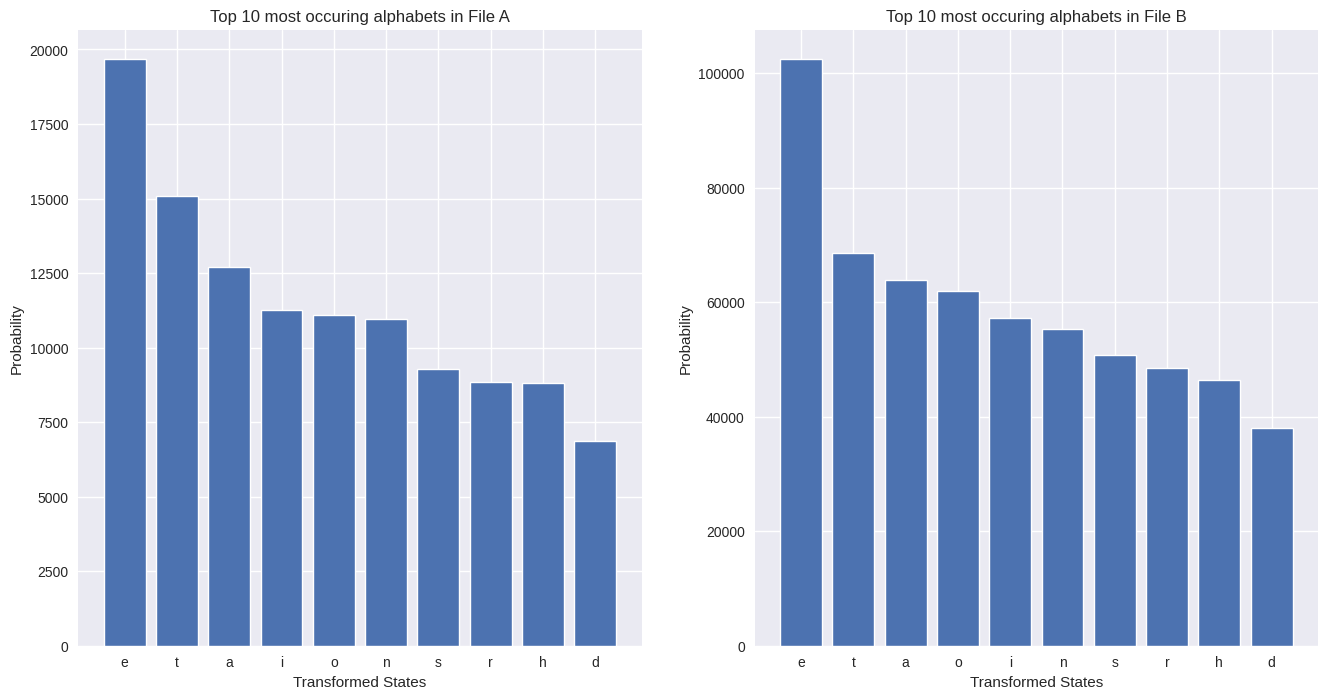

In [ ]:
# Making the condition for the plots
plt.style.use('seaborn-v0_8')
plt.figure( figsize=(16,8) )

# Plotting for file A
plt.subplot(1,2,1)
plt.xlabel('Transformed States');   plt.ylabel('Probability')
plt.title('Top 10 most occuring alphabets in File A')
plt.bar(fileA_top10.keys(), fileA_top10.values(), edgecolor="white",linewidth=1 )

# Plotting for file B
plt.subplot(1,2,2)
plt.xlabel('Transformed States');   plt.ylabel('Probability')
plt.title('Top 10 most occuring alphabets in File B')
plt.bar(fileB_top10.keys(), fileB_top10.values(), edgecolor="white",linewidth=1)

# Showing the bar plot
plt.show()


### __Observations__

#### File A
1. The Top 10 most occuring element and their frequencies are as follows:
   
   

|  e  |  t  |  a  |  i  |  o  |  n  |  s  |  r  |  h  |  d  |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 19678 | 15072 | 12717 | 11262 | 11108 | 10969 | 9288 | 8855 | 8798 | 6857 |

2. The Uncertainty in of the alphabets are as follows:
    
    
|  a  |  b  |  c  |  d  |  e  |  f  |
| --- | --- | --- | --- | --- | --- |
| 0.294737626983606 | 0.08566858314546652 | 0.1362084323586161 | 0.19807035932467246 | 0.3766658274599944 | 0.12901373901384622 |
|  g  |  h  |  i  |  j  |  k  |  l  |
| 0.12267568177448293 | 0.23386819335137668 | 0.2736638257967753 | 0.011415301416179365 | 0.05478010249529092 | 0.1936561430548301 |
|  m  |  n  |  o  |  p  |  q  |  r  |
| 0.14526025579082738 | 0.2692166950420098 | 0.2713353283863137 | 0.10572991128226748 | 0.007147143147259167 | 0.2348548045059465 |
|  s  |  t  |  u  |  v  |  w  |  x  |
| 0.24224038198928632 | 0.325649623910887 | 0.1429721386434424 | 0.06178766359885385 | 0.12314104537709523 | 0.016020070806682458 |
|  y  |  z  |
| 0.10996196523156698 | 0.007263335338108487 |
  
3. The Entropy for the English alphabets is _4.173_.

4. If all the alphabets were equiprobable, then the entropy would approximately be _-4.70_.
---
#### File B

1. The Top 10 most occuring element and their frequencies are as follows:
      
      
  |  e  |  t  |  a  |  o  |  i  |  n  |  s  |  r  |  h  |  d  |
  | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
  | 102429 | 68576 | 63844 | 61867 | 57146 | 55278 | 50845 | 48538 | 46393 | 37972 |

2. The Uncertainty in of the alphabets is as follows:
  
  
  |  a  |  b  |  c  |  d  |  e  |  f  |
  | --- | --- | --- | --- | --- | --- |
  | 0.2904216689629503 | 0.08726700028685597 | 0.12951754741050822 | 0.2081795671705995 | 0.37894691087836807 | 0.11907714898815029 |
  |  g  |  h  |  i  |  j  |  k  |  l  |
  | 0.10996172959736045 | 0.23765199869099976 | 0.27133229441257173 | 0.015222875890138082 | 0.053893841416423276 | 0.18903276586359158 |
  |  m  |  n  |  o  |  p  |  q  |  r  |
  | 0.14513897349056004 | 0.26576359328020754 | 0.28492482736885494 | 0.09405732455781027 | 0.011575417387160464 | 0.24469839713651606 |
  |  s  |  t  |  u  |  v  |  w  |  x  |
  | 0.2520870290870917 | 0.30313792977601334 | 0.1513076183939417 | 0.06452473862072222 | 0.1276745564227206 | 0.015057465959174107 |
  |  y  |  z  |
  | 0.12088704618803803 | 0.004634990065432768 |

3. The Entropy for the English alphabets is 4.176.

4. If all the alphabets were equiprobable, then the entropy would approximately be _-4.70_.


### __Result__


- #### _Common word_ : We can see that the 10 most occuring letter in the two files are nearly same. Furthermore, The most common letter is e, which also coincides with the fact that e is used the most times in English language itself.
- #### Similar _Uncertainty_ and _Entropy_: The value of uncertainty as calculated for the english alphabets in the two files is nearly same. This indicates that for very large text data, the distribution of alphabets follows a near similar pattern.   

---
## __Question 2__

### __Introduction__

- #### In the question, I am provided with 16 different states and their respective probability values.
- #### Since for a discrete varible, it is hard to get a proper uniform distribution. But we can get a near uniform distribution.

### __Procedure__

#### The procedure followed is given as follows:
1. #### First, I have normalized the variable initially given to obtain the pdf of the discrete variable.
2. #### After that, we obtained the cdf for the variable.
3. #### We use this cdf to transform this discrete variable.
4. #### After that, we plot the distribution of the new variable with the help of the bar plot.

### __Imports and Functions Used__

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame

def Transformation_cdf( cdf:list )->list:
  """
  This function is the transformation function. Here the cdf is used to transform the discrete variable.

  Args:
      cdf (list): This is a list which cotains the value of the cdf of the discrete variable.

  Returns:
      ans (list):
  """
  n = len( cdf ); ans = []; temp = 0

  for i in range( n ):

    ans.append( round( (n-1)*cdf[i] ) )

  return ans

### __Code__

In [ ]:
# ---------------------PART 1-----------------------
X = [
  ('r0' ,  0.5) , ('r1' , 0.25) , ( 'r2' , 0.125 ) , ( 'r3' ,  0.0625 ) , ('r4' ,  0.03125) , ( 'r5' ,  0.015625 ) , ( 'r6' , 0.03125 ) , ( 'r7' , 0.015625 ), ( 'r8' , 0.0078125 ) , ( 'r9' , 0.00390625 ) , ( 'r10' , 0.001953125 ) , ( 'r11' , 0.00390625 ) , ( 'r12' , 0.001953125 ) , ( 'r13' , 0.0009765625 ) , ( 'r14' , 0.00048828125 ) , ( 'r15' , 0.000244140625 )
]
# Taking the sum of the probability of the different states which will be later used as a normalizing value.
norm = sum( [ elem[1] for elem in X ] )
# After normalizing, we get the pdf of X and similarly, we can calculate the cdf of the variable
PDF = [  ( elem[0] , elem[1]/norm )  for elem in X  ]
CDF = [ ];  temp = 0

for i in  range( len( PDF ) ):
  temp += PDF[i][1]
  CDF.append( temp )

# Making the variable Y which is transformed using the cdf of X
Prob_Y = [ 0 for i in range(len(CDF))]

# Storing the transformation in a new list
transform = Transformation_cdf( CDF )
for i in range( len(CDF) ):
  pos = int( transform[i] )
  Prob_Y[pos] +=  X[i][1]
Y = [ ( f's{i}' , Prob_Y[i] ) for i in range( len(CDF) )]

# Creating the dictionary for the data to be displayed
Variable = {
  'States' : [ elm[0] for elm in X ], 'Given probability' : [ elm[1] for elm in X ], 'PDF': [ elm[1] for elm in PDF ], 'CDF':CDF
}

Y_pdf = {
  'States' : [ elm[0] for elm in Y ], 'PDF' : [ elm[1] for elm in Y ]
}

In [ ]:
print( "Initial Variable" )
DataFrame( Variable )

Initial Variable


,States,Given probability,PDF,CDF
0,r0,0.500000,0.475064,0.475064
1,r1,0.250000,0.237532,0.712596
2,r2,0.125000,0.118766,0.831362
3,r3,0.062500,0.059383,0.890745
4,r4,0.031250,0.029691,0.920436
5,r5,0.015625,0.014846,0.935282
6,r6,0.031250,0.029691,0.964973
7,r7,0.015625,0.014846,0.979819
8,r8,0.007812,0.007423,0.987242
9,r9,0.003906,0.003711,0.990953


In [ ]:
print( "Final Variable" )
DataFrame( Y_pdf )

Final Variable


,States,PDF
0,s0,0.000000
1,s1,0.000000
2,s2,0.000000
3,s3,0.000000
4,s4,0.000000
5,s5,0.000000
6,s6,0.000000
7,s7,0.500000
8,s8,0.000000
9,s9,0.000000


### __Plot__

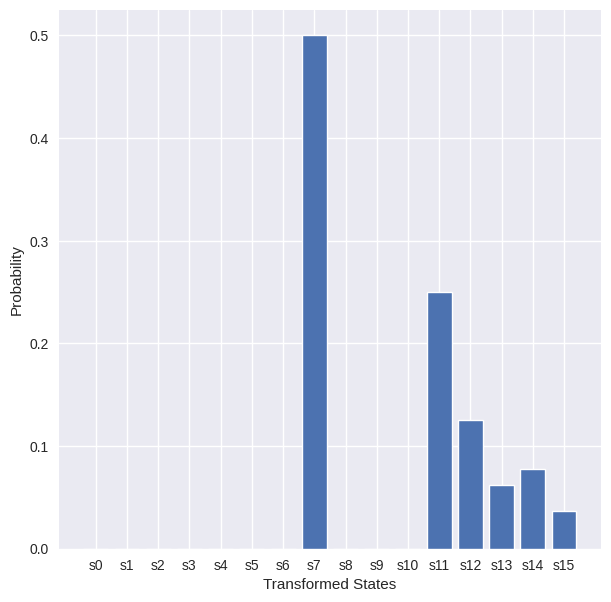

In [ ]:
# Making the condition for the plots
plt.style.use('seaborn-v0_8')
plt.figure( figsize=(7,7) )
plt.xlabel('Transformed States');   plt.ylabel('Probability')
plt.bar(Y_pdf['States'], Y_pdf['PDF'], edgecolor="white",linewidth=1 )

# Showing the bar plot
plt.show()

### __Observations__

- #### Intially, the maximum probability(nearly 50%) was of the first state.
- #### After the transformation, the probability distribution has shifted with its peak nearly at the middle.
- #### A Proper uniform distribution is not obtained here.  

### __Result__

- #### The transformation of a discrete variable has a very less probability to lead to a Uniform Distribution.
- #### The reason for the above statement can be subjected to the approximation of the transformation values obtained to get a proper state-to-state transformation.

---
## __Question 3__

### __Introduction__

#### In the above question, it is asked to obtain random numbers which have the distribution as shown in the question.
#### The distribution shown in the question has the _pdf_ given below:
$$
  f(x) = \dfrac{(x-1)}{3} \;\;\;\;  for \;\;1\leq x\leq3
$$

### __Procedure__

#### The procedure we have here is the _inverse transformation sampling_ and the complete procedure used is given as follows
  1. #### We know that if we use the _cumulative distribution function_  as the transformation, then we get a Variable which follows _Uniform Distribution_.
  $$  F_Y(y) = P(Y\leq y) $$
  $$ F_Y(y) = P( g(X)\leq y ) \;\;\;\;  where \;\;\;\;   g(X) = F_X(x) $$

  2. #### Since, g is an increasing function.
  $$  F_Y(y) = P(X\leq g^{-1}(Y))  $$
  $$ F_Y(y) = F_X(g^{-1}(Y)) $$
  
  3. #### We know that the pdf is obtained by differentiating the cdf for a continuous variable.
  $$ f(y) = \dfrac{d}{dx} \; F_Y(y) $$
  $$ f(y) = F_X^{'}(g^{-1}(Y))\;(g^{-1}(Y))^{'} $$
  $$ f(y) = f_X(g^{-1}(y))\;\;\dfrac{d}{dy}\;g^{-1}(Y) $$
  
  4. #### After doing the above operations for the function, we will obtain the f(y) as 1. We can normalize it.
  $$ y = \dfrac{(x-1)^2}{4} $$
  5. #### After inverting it, we get the function which is to be used for transformation.
  $$ x = 1 + \sqrt{4y}$$
  $$ x = 1 + 2\sqrt{y}$$

### __Imports and Functions Used__

In [ ]:
import matplotlib.pyplot as plt
from numpy.random import uniform as rand
from numpy import sqrt as nsqrt
from pandas import DataFrame

### __Code__

In [ ]:
data = { }

# Regulating the size of random numbers generated
ln = 10000

data['Random_num'] = rand(0, 1, ln)
data['Prob'] = ( 1 + 2* nsqrt( data['Random_num'] ))
DataFrame(data)

,Random_num,Prob
0,0.658847,2.623387
1,0.206921,1.909771
2,0.492863,2.404084
3,0.133669,1.731214
4,0.405202,2.273109
...,...,...
9995,0.478338,2.383240
9996,0.241929,1.983725
9997,0.964894,2.964580
9998,0.056840,1.476824


### __Plots__

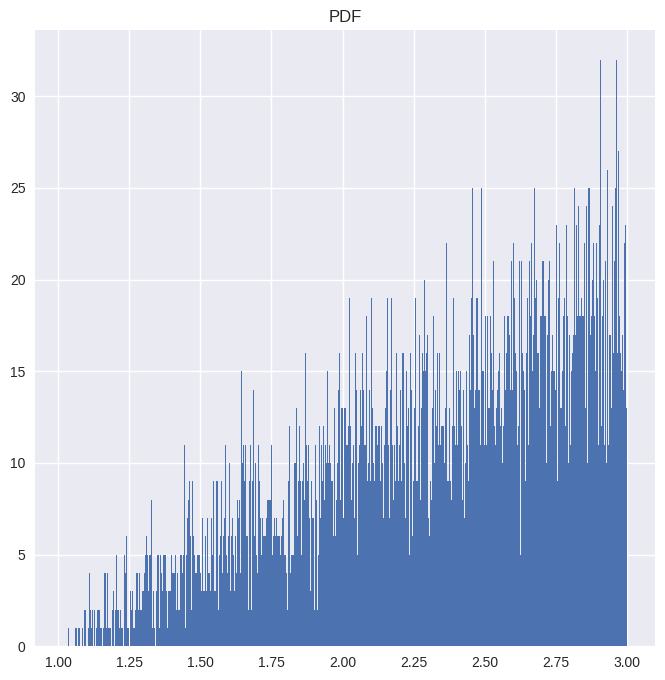

In [ ]:
# Adjusting the bin size to observe the impact on the visualisation
bin_size = 1000

# Plotting the distribution
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(8,8))
plt.hist( data['Prob'] , bins=bin_size)
plt.title('PDF')

plt.show()

### __Observations__

- #### Inverse transformation sampling, which we have used above takes samples between 0 and 1, which can be said to be probability, and then returns the smallest number
$$ x ∈ R \;\;such \;\; that \;\;\;y \leq f(x) $$
- #### As we increase the bin size further, we will see that the psuedo-random numbers which are generated are from the distribution given in the question.

### __Results__

- #### This is in line with the fact that if we apply cdf as a transformation, we get a variable which follows random distribution.

---
## __Question 4__

### __Introduction__

- #### Here, A gray-scale image is to be taken and its intensity histogram is to be plotted. After that, we have to build a equalisation function to get a equalised histogram.
- #### After that, a random value transformation to the gray value is to be applied to get a uniform PMF.

### __Procedure__

#### The procedure followed is given as follows:
  1. #### With the help of OpenCV, the image is read. Since the image taken initially is colored, it is converted to the grayscale form.
  2. #### Next, I generated the image histogram with the help of a list with of size 256 where the index value is the intensity.
  3. #### After that the histogram is visulaized using different value of bins.
  4. #### Then I created the `Image_equilize` function which equalises the image with the help of transformation of discrete varible to a variable following a near _Uniform Distribution_. This is done by using the cdf as the transformation function.
  5. #### Afterwards, we see the difference in the image and histogram of the initial grayscale image and the equalised one.  

### __Imports and Functions used__

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable

def pretty_table( message , obj ):
  """It just prints the dictionary containing letter count in a better format. """

  TABLE = PrettyTable()
  for c in obj.keys():
    TABLE.add_column(c, [  ])
  TABLE.add_row( [ obj[ ky ] for ky in obj.keys() ] )

  print( f'{message}\n' , TABLE )

# Function for Histogram Equilisation
def Image_equilise( X:dict , image:list )->( dict , list ):
  """_summary_
    This returns the equalised image along with the frequency list of intersities for the calculation in the histogram. The procedure used here is the transformation of the discrete variable with the help of its cumulative distributive function.
  Args:
      X (dict): This is a dictionary which has contains the intensity value as the keys and their value are their frequency value.
      image (list): this contains the vector of the original grayscale image file.

  Returns:
      ( list , list ): It returns a tuple which contains the frequency of the equalised image and the equalised image as a vector.
  """
  data = {  'key':[], 'value':[]  }

  for key in X:
    data['key'].append(key)
    data['value'].append(X[key])
  summ = sum(data['value']);   ln = 256


  data['pdf'] = [ value/summ for value in data['value']  ]
  data['cdf'] = []; temp = 0
  for i in range( ln ):
    temp += data['pdf'][i]
    data['cdf'].append(temp)

  transform = [ round(255*data['cdf'][i]) for i in range( ln ) ]

  EQ_pix_data = [ ]

  XY_mapping = { i:transform[i] for i in range( ln ) }

  equalized_image = []
  for i in range( ln ):

    temp = []
    for j in range( ln ):

      var = XY_mapping.get(image[i][j])
      if var == None:
        var = 0

      temp.append( var )
      EQ_pix_data.append(var)

    equalized_image.append(temp)

  return ( EQ_pix_data , equalized_image  )

### __Code__

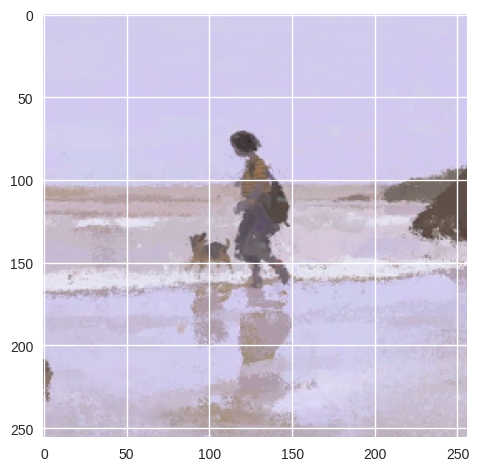

In [ ]:
# Reading the image
org_image = cv2.imread('./test2.png' )
plt.imshow(org_image)

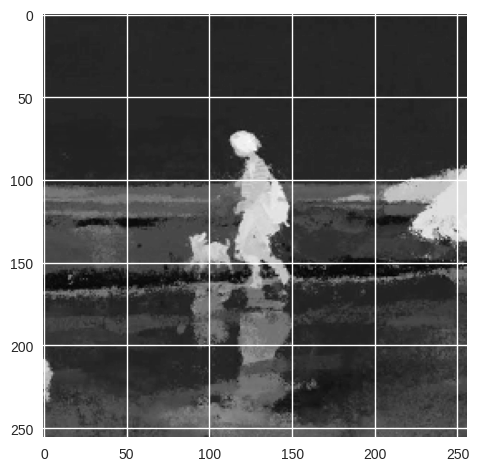

In [ ]:
# Converting the image to gray-scale
image = cv2.cvtColor(org_image , cv2.COLOR_BGR2GRAY)
plt.imshow( image )

In [ ]:
pix = { i:0 for i in range(256)}

pix_data = []
for i in range(256):
  for j in range(256):

    pix[ image[i][j] ] += 1
    pix_data.append(image[i][j])

print("" , pix )

 {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 1, 34: 1, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 1, 46: 0, 47: 0, 48: 0, 49: 2, 50: 0, 51: 1, 52: 1, 53: 2, 54: 3, 55: 5, 56: 7, 57: 7, 58: 7, 59: 11, 60: 7, 61: 12, 62: 8, 63: 7, 64: 12, 65: 5, 66: 6, 67: 5, 68: 8, 69: 15, 70: 21, 71: 22, 72: 32, 73: 60, 74: 46, 75: 39, 76: 36, 77: 29, 78: 109, 79: 242, 80: 100, 81: 60, 82: 45, 83: 37, 84: 48, 85: 40, 86: 45, 87: 63, 88: 77, 89: 55, 90: 64, 91: 52, 92: 47, 93: 50, 94: 52, 95: 47, 96: 49, 97: 51, 98: 50, 99: 45, 100: 52, 101: 54, 102: 57, 103: 53, 104: 83, 105: 98, 106: 124, 107: 145, 108: 122, 109: 78, 110: 61, 111: 72, 112: 66, 113: 44, 114: 55, 115: 33, 116: 43, 117: 32, 118: 37, 119: 30, 120: 26, 121: 18, 122: 23, 123: 27, 124: 21, 125: 22, 126: 17, 127: 21, 128: 19, 129: 15

### __Plots__

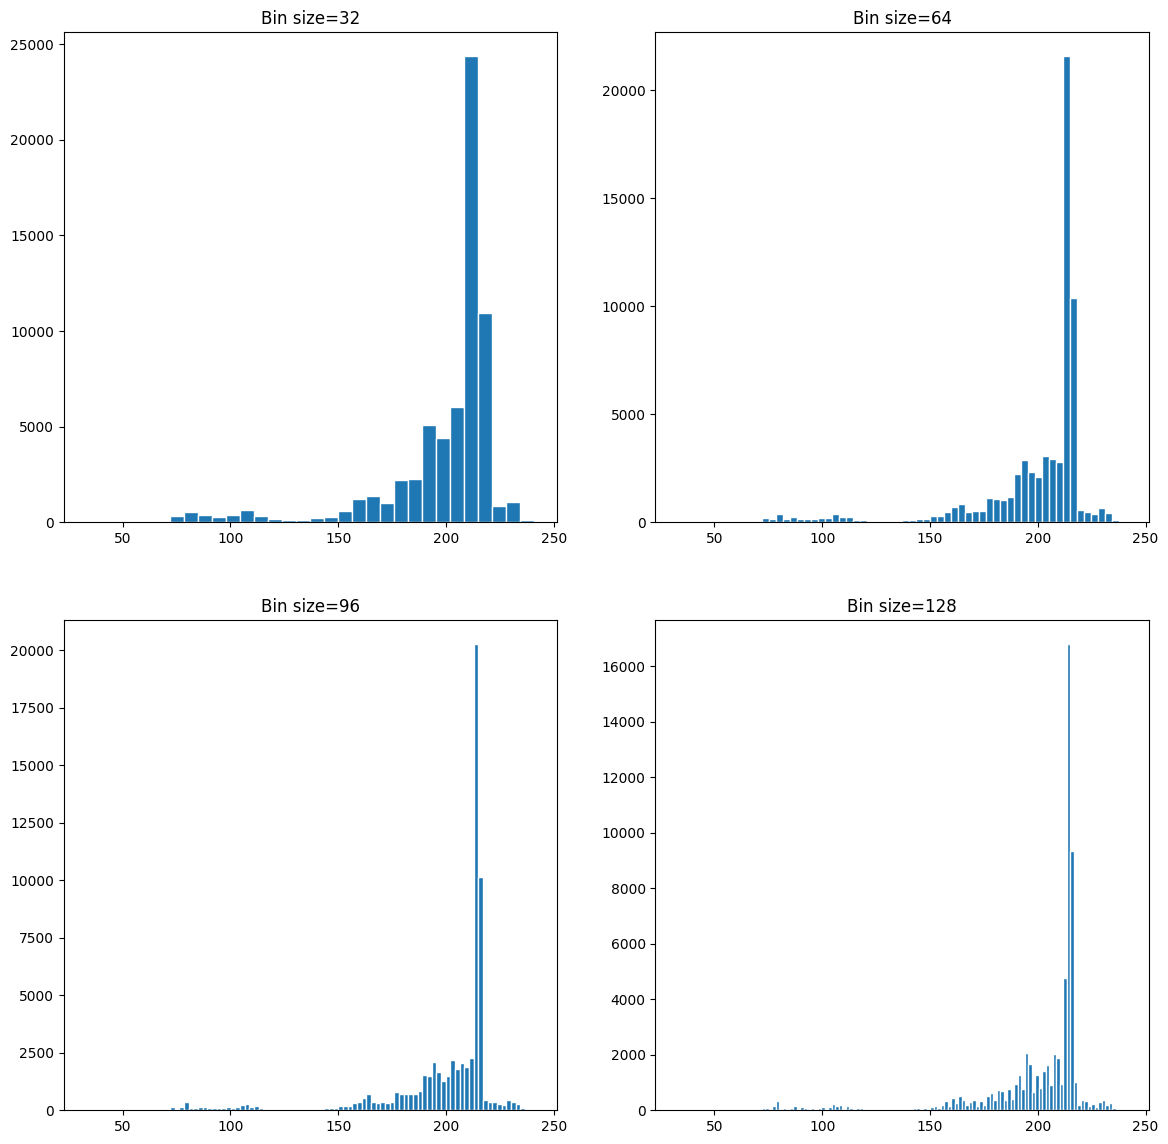

In [ ]:
# Different bin sizes used to show impact on the visualization
bin_size = [32 ,64 ,96 ,128]

plt.figure( figsize=(14,14)  ); #plt.rcParams['figure.autolayout']=True
for i in range( len( bin_size ) ):

  # Making the condition for the plots
  plt.style.use( 'default' )
  plt.subplot(2,2,i+1)
  plt.title(f"Bin size={bin_size[i]}")

  # Showing the bar plot
  plt.hist(pix_data, bins=bin_size[i], linewidth=1, edgecolor="white")


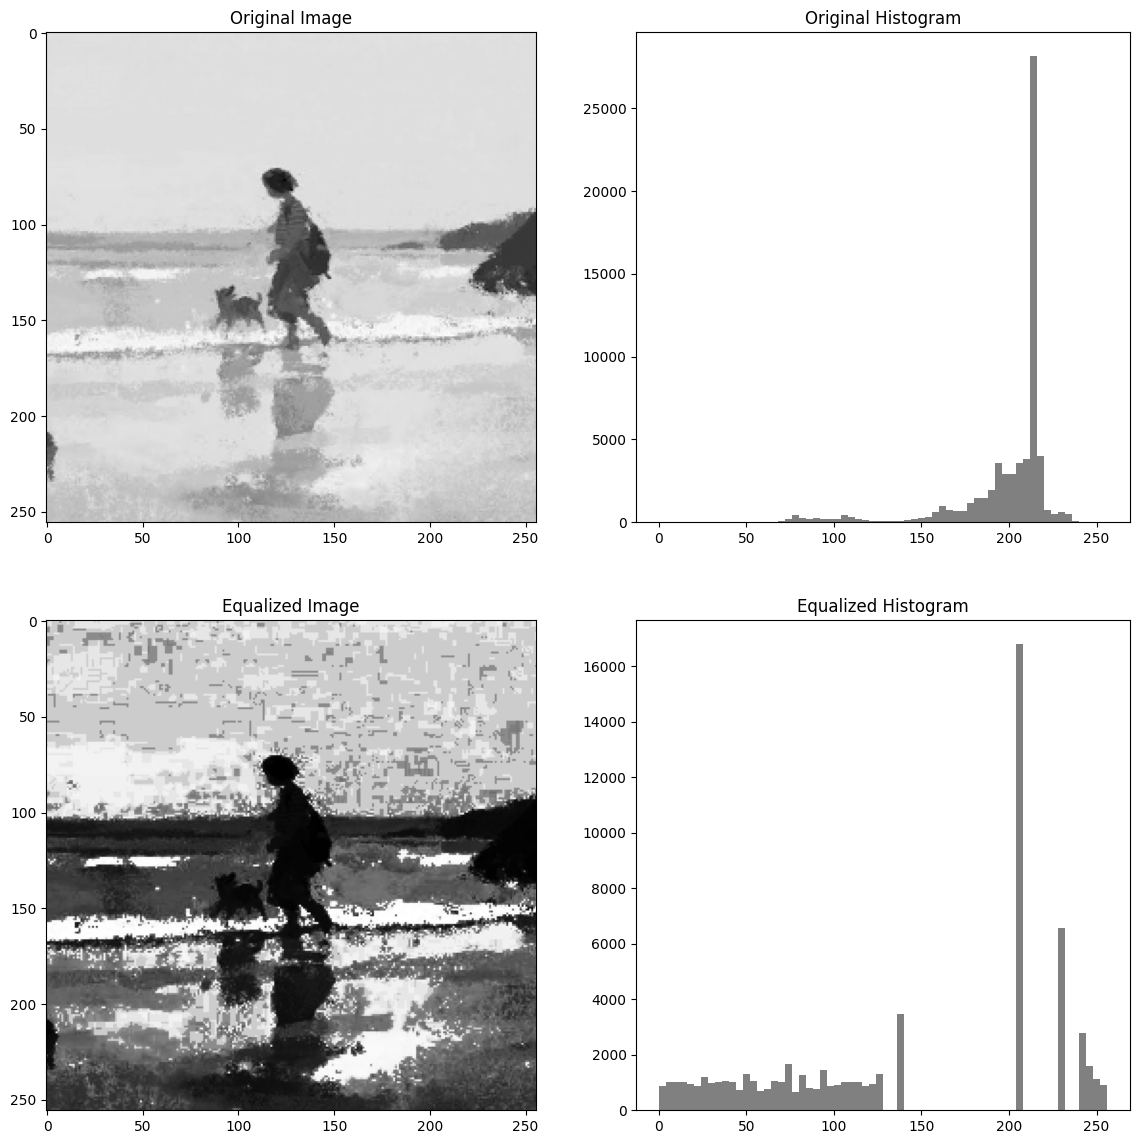

In [ ]:
# Applying histogram equalization using the equalization function made by self
eq_data, equalized_image = Image_equilise( pix , image )

# Plot the images and the original histograms
plt.figure(figsize=(14, 14))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.hist(pix_data, bins=64, range=[0, 256], color='gray')
plt.title('Original Histogram')

plt.subplot(2, 2, 3)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')

plt.subplot(2, 2, 4)
plt.hist(eq_data, bins=64, range=[0, 256], color='gray')
plt.title('Equalized Histogram')

plt.show()

### __Observations__

- #### The original intensity histogram of the image had a very high peak for a specific intensity value. This can be visualised in the image itself as the area leaving the girl and the dog is bright and has a similar value of intesity.
- #### It is observed that the intensity histogram of the image after equalisation follows a near Uniform distribution.
- #### But the image has an increase level of noise and it disrupts the information shown in the image.


### __Results__

- #### In the case above, the equalisation leads to the creation of noise in the image which can lead us to the point that such type of images where a specific range of intensity value occur in the image' pixels should not be equalised. This could lead to the loss of information which is being shown in the image.
- #### This also leads us to the fact that the equalisation of a bright image will lead to its darkening or many of its feature might become less observable.
- #### Hence, it becomes important for the person processing the image to observe the intensity histogram and apply operations on the intensity depending on the need of the person.

---
## __References__

- #### [Help in Markdown](https://kapeli.com/cheat_sheets/LaTeX_Math_Symbols.docset/Contents/Resources/Documents/index)
- #### [Matplotlib : Documentation](https://matplotlib.org/stable/index.html)
- #### [OpenCV Tutorials and Documentation](https://docs.opencv.org/3.4/d6/d00/tutorial_py_root.html)